# 資料匯入

In [1]:
import pandas as pd
df = pd.read_csv("iris.csv",encoding = "big5") #也可load sklearn內建iris datasets
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 切分資料 (為作圖方便，先只選取兩個features)

In [2]:
from sklearn.model_selection import train_test_split

X = df[['花萼長度','花萼寬度']]
y = df['屬種']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
X_train.head()

,花萼長度,花萼寬度
143,6.8,3.2
80,5.5,2.4
133,6.3,2.8
76,6.8,2.8
44,5.1,3.8


In [11]:
print(X_train.shape)
print(y_train.shape)
y_train.head()

(105, 2)
(105,)


143     Iris-virginica
80     Iris-versicolor
133     Iris-virginica
76     Iris-versicolor
44         Iris-setosa
Name: 屬種, dtype: object

### 標準化

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print("X_train_std : \n",X_train_std[:5])
print("y_train : \n",y_train[:5])
print(type(y_train[:5]))


X_train_std : 
 [[ 1.33604365  0.34499692]
 [-0.36516865 -1.43290131]
 [ 0.68173123 -0.5439522 ]
 [ 1.33604365 -0.5439522 ]
 [-0.88861859  1.67842059]]
y_train : 
 143     Iris-virginica
80     Iris-versicolor
133     Iris-virginica
76     Iris-versicolor
44         Iris-setosa
Name: 屬種, dtype: object
<class 'pandas.core.series.Series'>


# 一、KNN
### 可調整k, weight (uniform, distance)
### 由於是距離判定,因此無須onehotencoder

In [13]:
from sklearn.neighbors import KNeighborsClassifier
#分類的Report
from sklearn import metrics
#uniform : 最近k個鄰居的權重一樣來決定類別
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### 準確度 & 混淆矩陣

In [5]:
print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.92      0.96        13
Iris-versicolor       0.82      0.45      0.58        20
 Iris-virginica       0.50      0.92      0.65        12

       accuracy                           0.71        45
      macro avg       0.77      0.76      0.73        45
   weighted avg       0.79      0.71      0.71        45

[[12  1  0]
 [ 0  9 11]
 [ 0  1 11]]


### 視覺化混淆矩陣函式（from scikit-learn官網）

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Confusion matrix, without normalization
[[12  1  0]
 [ 0  9 11]
 [ 0  1 11]]


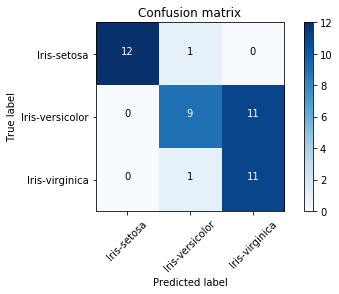

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, knn.predict(X_test_std))
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
#注意：targeet_names必須和confusion_matrix中labels的順序一致
plot_confusion_matrix(cnf_matrix, classes=target_names) 
plt.show()

## 決策邊界

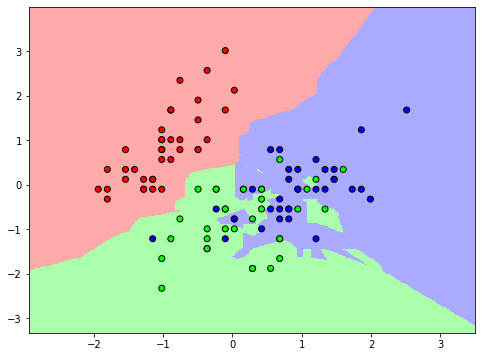

In [8]:
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
import matplotlib.patches as mpatches

# 把類別轉成0,1,2，散佈圖上色用
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
#由於 y_color 
y_color = le.transform(y_train)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # 著色時每格大小
# 設定x,y邊界、著色格子
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# 預測、類別轉成0,1,2
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = le.transform(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))

# 上色
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# 資料散佈
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_color, cmap=cmap_bold, edgecolor='k')
# x,y邊界設定
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()